## Census Income Data Set 

In [7]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install requests

In [243]:
# Import libraries necessary for this project

# Linear Algebra
import numpy as np

# Data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from __future__ import division
import urllib
import os
import io
import requests
from censusdata import datapickle
# Pretty display for notebooks
%matplotlib inline

The modified census dataset consists of approximately 32,000 data points, with each datapoint having 14 features. This dataset is a modified version of the dataset published in the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", by Ron Kohavi. You may find this paper online, with the original dataset hosted on [UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income).

The objective of this analysis is to predict whether an individual's income will be greater than $50,000 per year based on several features from the data.

# Getting the Data

**PLEASE RUN THE CELL BELOW ONLY ONCE**

In [560]:
# Load the Census dataset from online 
ics_census_income_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
s=requests.get(ics_census_income_url).content

In [561]:
# Extract the data and save to file
datapickle.request_to_pickle(s)

In [563]:
# Load Adult.data:
orig_data = pd.read_pickle('./data/Adult.data')
orig_data.head(5)

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [564]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age                32560 non-null int64
workclass          32560 non-null object
fnlwgt             32560 non-null int64
education_level    32560 non-null object
education-num      32560 non-null int64
marital-status     32560 non-null object
occupation         32560 non-null object
relationship       32560 non-null object
race               32560 non-null object
sex                32560 non-null object
capital-gain       32560 non-null int64
capital-loss       32560 non-null int64
hours-per-week     32560 non-null int64
native-country     32560 non-null object
income             32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**The dataset has 32560 entries and 14 features + the target variable (income).** 6 features are integers and 8 are objects.

#### Features

**age**: Age

**workclass**: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

**fnlwgt**: final weight or the number of people that the census believes the entry represents based on 3 sets of controls:
    * A single cell estimate of the population 16+ for each state.

    * Controls for Hispanic Origin by age and sex.

    * Controls by Race, age and sex.

**education_level**: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

**education-num**: Number of educational years completed

**marital-status**: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

**occupation**: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

**relationship**: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

**race**: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

**sex**: Sex (Female, Male)

**capital-gain**: Monetary Capital Gains

**capital-loss**: Monetary Capital Losses

**hours-per-week**: Average Hours Per Week Worked

**native-country**: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

### Target Variable

**income**: Income Class (<=50K, >50K)

# Data Exploration

In [565]:
# Before
orig_data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [566]:
# remove whitespace from every Pandas Data frame cell that has a stringlike object in it
orig_data = orig_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [567]:
# After
orig_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [568]:
orig_data

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [569]:
# Map the features to numerial values
def feature_dict(df, feature ='workclass'):
    unique_feat = df[feature].unique()
    feat_dict = {}
    count = 0
    for cat in unique_feat:
        print(cat)
        feat_dict[cat] = count
        count += 1
    return feat_dict

**1. Age**

In [571]:
orig_data

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Male')

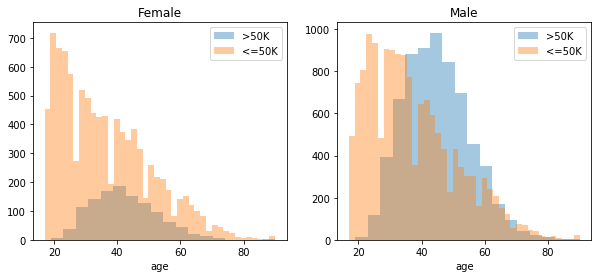

In [574]:
n_greater_50k = '>50K'
n_at_most_50k = '<=50K'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = orig_data[orig_data['sex']== 'Female']
men = orig_data[orig_data['sex'] == 'Male']
ax = sns.distplot(women[women.income =='>50K'].age.dropna(), bins=18, label = n_greater_50k, ax = axes[0], kde =False)
ax = sns.distplot(women[women.income =='<=50K'].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men.income =='>50K'].age.dropna(), bins=18, label = n_greater_50k, ax = axes[1], kde = False)
ax = sns.distplot(men[men.income =='<=50K'].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [432]:
print('min age is {}'.format(orig_data.age.min()))
print('max age is {}'.format(orig_data.age.max()))
print('average age is {}'.format(round(orig_data.age.mean())))

min age is 17
max age is 90
average age is 39.0


/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


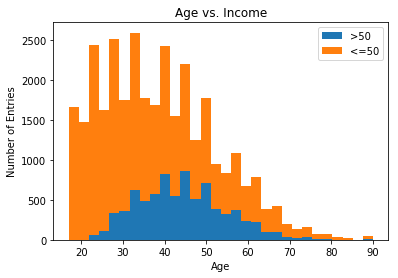

In [433]:
# figure = plt.figure(figsize=(15,8))
plt.hist([orig_data[orig_data['income']=='>50K']['age'], orig_data[orig_data['income']=='<=50K']['age']], stacked=True, bins=30, label=['>50','<=50'])
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Number of Entries')
plt.legend()

Men have a high probability of earning >50K when they are between 30 and 60 years old. 
This is also true for women. However, for women the probability of earning >50K are higher between 25 and 50 years old. 

Since there seem to be **certain ages, which have increased odds of higher income**. It is also clear that in groups 11-20, and 71-100, there is almost no chance to have an income of greater than 50k. 

Most individuals earning over $50,000 are between the ages 25 and 65 years old.

**2. workclass**

In [434]:
orig_data.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [435]:
# remove rows where workclass is unknown
orig_data = orig_data[orig_data.workclass != '?']
print(orig_data.workclass.unique())

['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [436]:
[orig_data[orig_data['income']=='>50K']['workclass'].value_counts()]

[Private             4963
 Self-emp-not-inc     724
 Self-emp-inc         622
 Local-gov            617
 Federal-gov          371
 State-gov            353
 Name: workclass, dtype: int64]

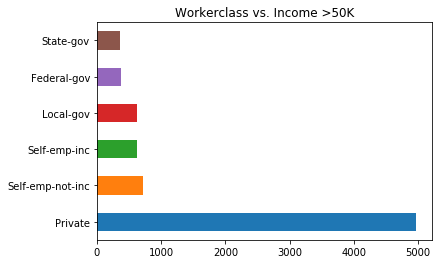

In [437]:
workclass_greater = orig_data[orig_data['income']=='>50K']['workclass'].value_counts()
workclass_at_most = orig_data[orig_data['income']=='<=50K']['workclass'].value_counts()
# index =[orig_data.workclass.unique()] 
# df = pd.DataFrame({'workclass_greater': workclass_greater,'workclass_at_most':workclass_at_most}, index=index)
# df = pd.DataFrame({'workclass_greater': workclass_greater.values,'workclass_at_most': workclass_at_most.values}, index=index)
# ax = df.plot.barh()
workclass_greater.plot.barh(title ='Workerclass vs. Income >50K')

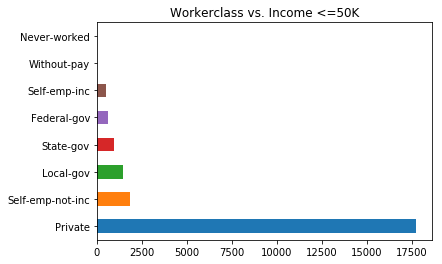

In [438]:
workclass_at_most.plot.barh(title ='Workerclass vs. Income <=50K')

In [439]:
# plt.hist([orig_data[orig_data['income']=='>50K']['workclass'], orig_data[orig_data['income']=='<=50K']['workclass']], stacked=True, bins=30, label=['>50','<=50'], orientation="horizontal")
# plt.title('Workclass vs. Income')
# plt.ylabel('Workclass')
# plt.xlabel('Number of Entries')
# plt.legend()

# orig_data.plot.barh([orig_data[orig_data['income']=='>50K']['workclass']])

In [440]:
# Map workclass category to numerical equivalent
feature ='workclass'
workclass = feature_dict(orig_data,feature)
orig_data['workclass2'] = orig_data['workclass'].map(workclass)

Self-emp-not-inc
Private
State-gov
Federal-gov
Local-gov
Self-emp-inc
Without-pay
Never-worked


/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [441]:
# Map income category to numerical equivalent
feature ='income'
income = feature_dict(orig_data,feature)
orig_data['income2'] = orig_data['income'].map(income)

<=50K
>50K


/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Self-emp-not-inc 0                             
Private  1                             
State-gov 2                             
Federal-gov 3                             
Local-gov 4                             
Self-emp-inc 5                             
Without-pay 6                             
Never-worked 7                             


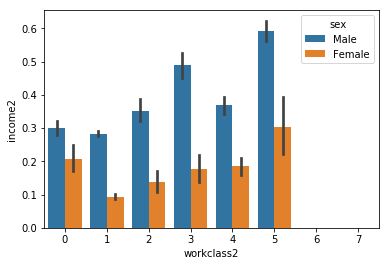

In [442]:
sns.barplot(x='workclass2', y='income2', data=orig_data, hue="sex")
# print( "{:<8} {:<30}".format('Key','Label'))
for keys in workclass:
    label = workclass[keys]
    print("{:<8} {:<30}".format(keys, label))

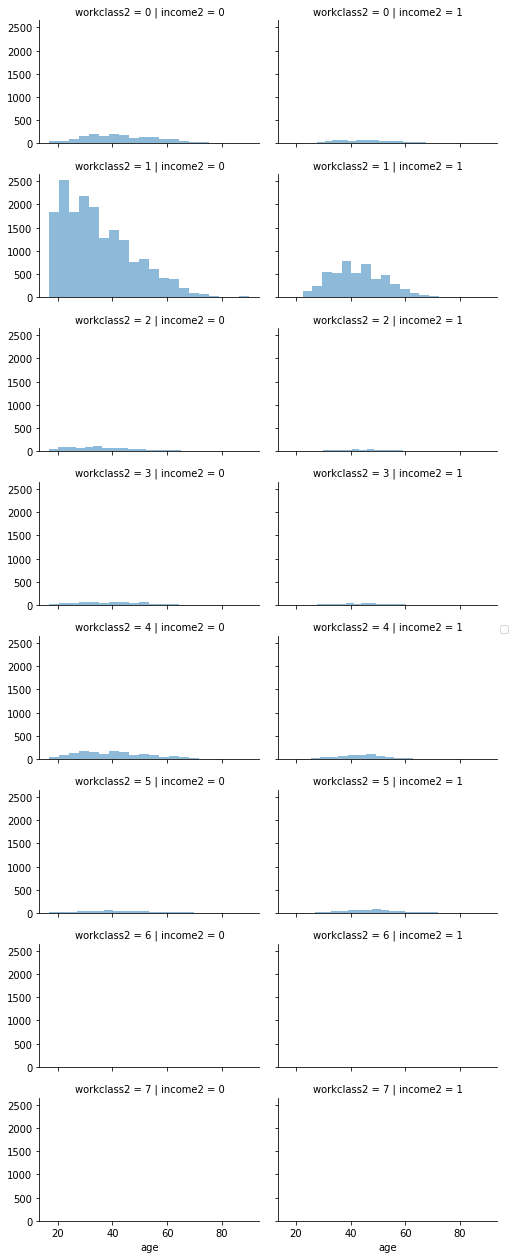

In [443]:
grid = sns.FacetGrid(orig_data, col='income2', row='workclass2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

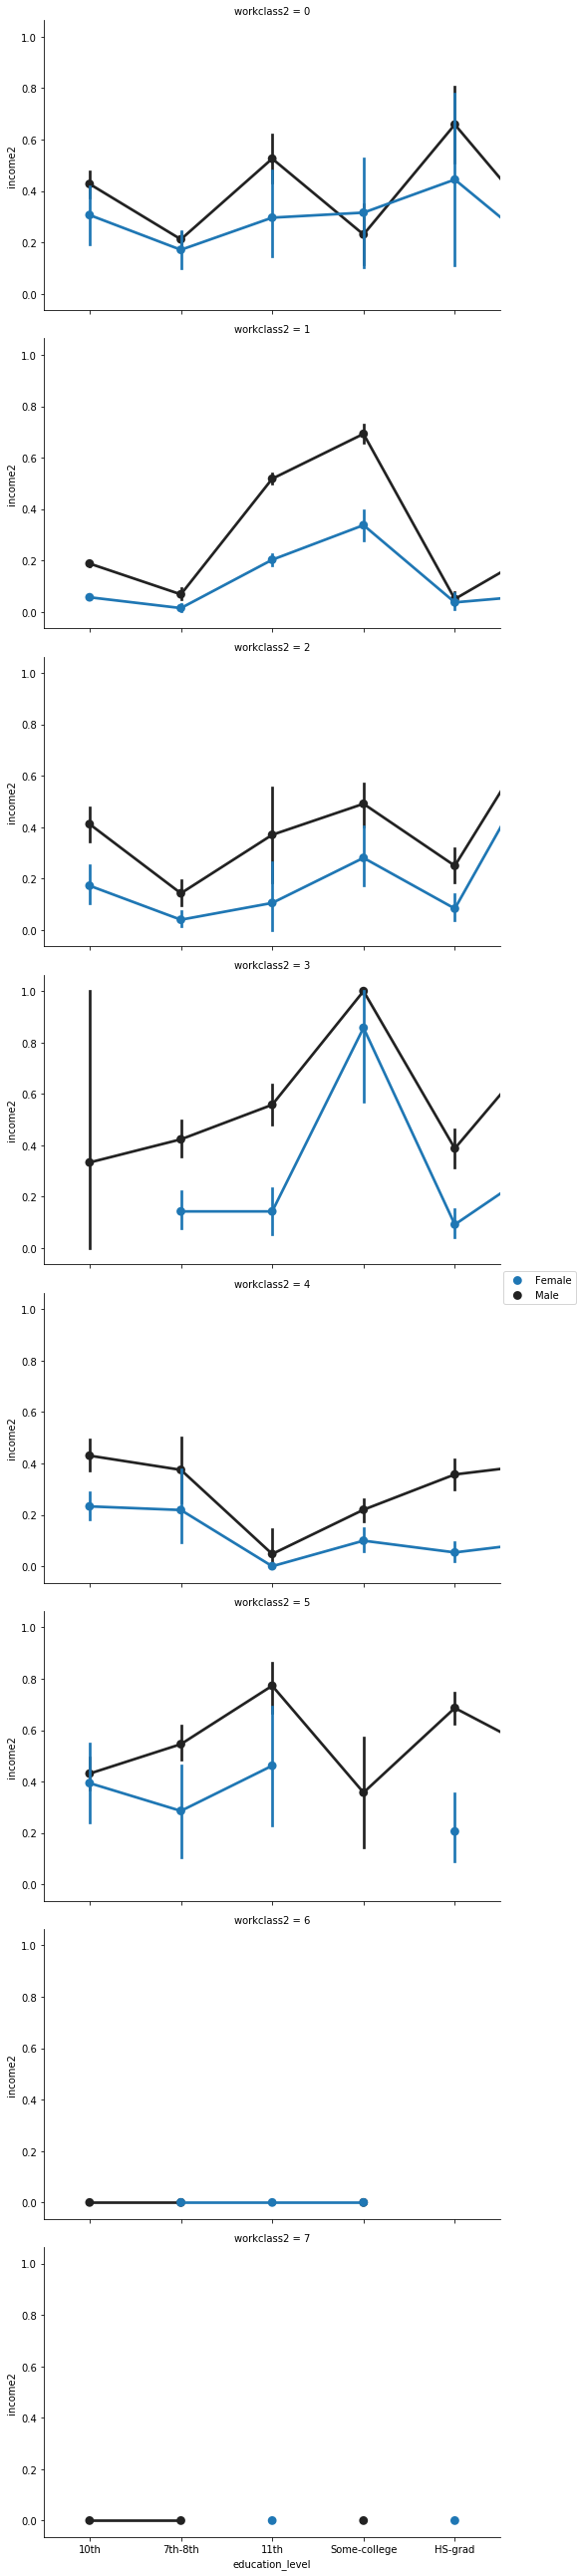

In [444]:
FacetGrid = sns.FacetGrid(orig_data, row='workclass2', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'education_level', 'income2', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Working for the federal government shows a high probability of earning an income being <=50K and low probability of earning an income >50K

**3. Final Weight**

In [445]:
# Drop "fnlwgt" from the dataset, because it does not contribute to predicting a persons income. 
orig_data = orig_data.drop(['fnlwgt'], axis=1)
orig_data.head(n=8)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass2,income2
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
5,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0
6,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1
7,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1,1


Workclass seems to be correlated with income, depending on the gender.

**4. education_level**

In [446]:
# Map income education_level to numerical equivalent
feature ='education_level'
education_level = feature_dict(orig_data,feature)
orig_data['education_level2'] = orig_data['education_level'].map(education_level)

Bachelors
HS-grad
11th
Masters
9th
Some-college
Assoc-acdm
Assoc-voc
7th-8th
Doctorate
Prof-school
5th-6th
10th
Preschool
12th
1st-4th


Bachelors 0                             
HS-grad  1                             
11th     2                             
Masters  3                             
9th      4                             
Some-college 5                             
Assoc-acdm 6                             
Assoc-voc 7                             
7th-8th  8                             
Doctorate 9                             
Prof-school 10                            
5th-6th  11                            
10th     12                            
Preschool 13                            
12th     14                            
1st-4th  15                            


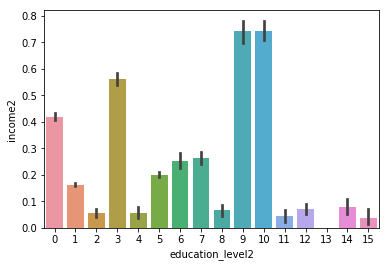

In [447]:
sns.barplot(x='education_level2', y='income2', data=orig_data)
for keys in education_level:
    label = education_level[keys]
    print("{:<8} {:<30}".format(keys, label))

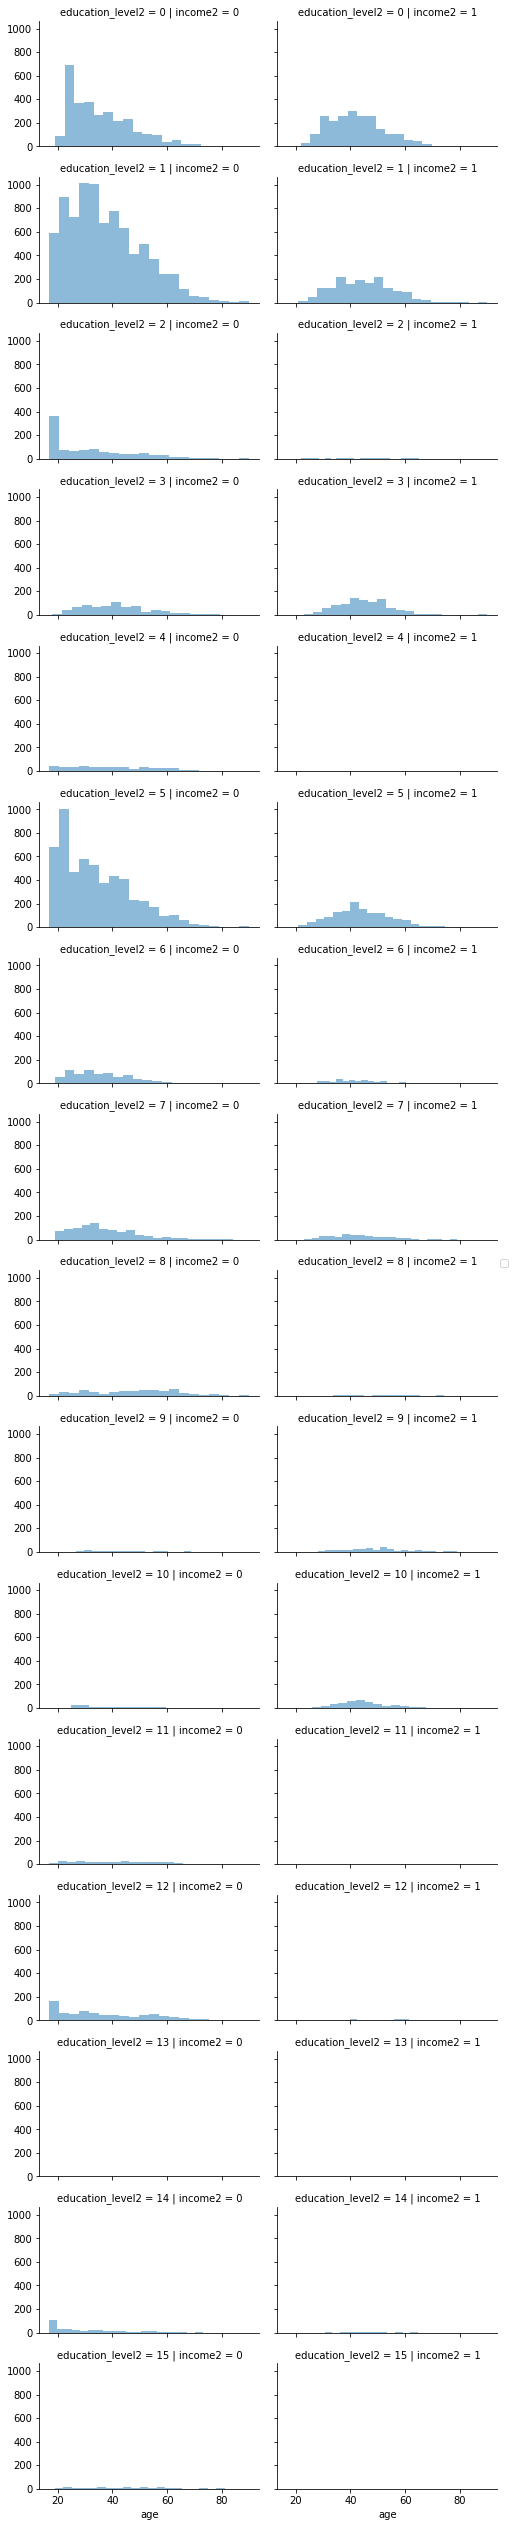

In [448]:
grid = sns.FacetGrid(orig_data, col='income2', row='education_level2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**5. education_num**

In [449]:
orig_data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  1,  8,  2])

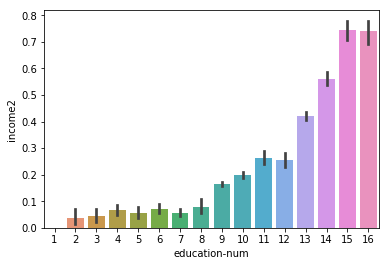

In [450]:
sns.barplot(x='education-num', y='income2', data=orig_data)
# for keys in education_num:
#     label = education_num[keys]
#     print("{:<8} {:<30}".format(keys, label))

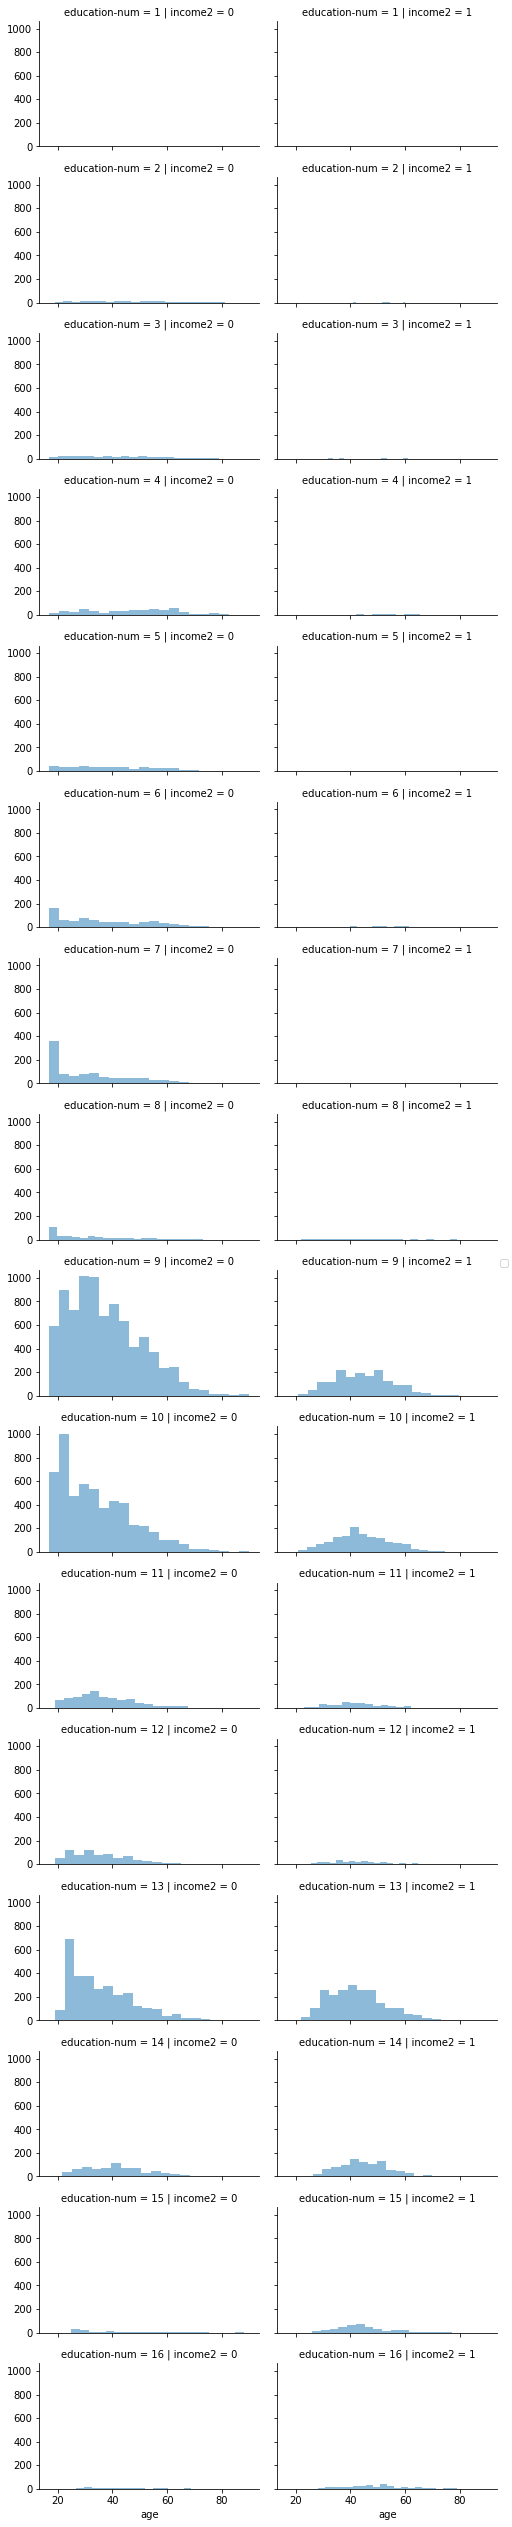

In [451]:
grid = sns.FacetGrid(orig_data, col='income2', row='education-num', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**5. marital-status**

In [452]:
# Map income education_level to numerical equivalent
feature ='marital-status'
marital_status = feature_dict(orig_data,feature)
orig_data['marital-status2'] = orig_data['marital-status'].map(marital_status)

Married-civ-spouse
Divorced
Married-spouse-absent
Never-married
Separated
Married-AF-spouse
Widowed


Married-civ-spouse 0                             
Divorced 1                             
Married-spouse-absent 2                             
Never-married 3                             
Separated 4                             
Married-AF-spouse 5                             
Widowed  6                             


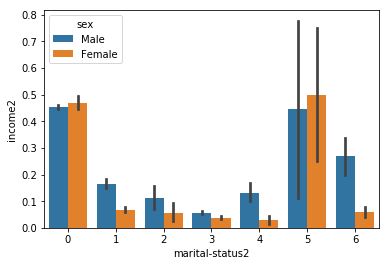

In [453]:
sns.barplot(x='marital-status2', y='income2', data=orig_data,  hue='sex')
for keys in marital_status:
    label = marital_status[keys]
    print("{:<8} {:<30}".format(keys, label))

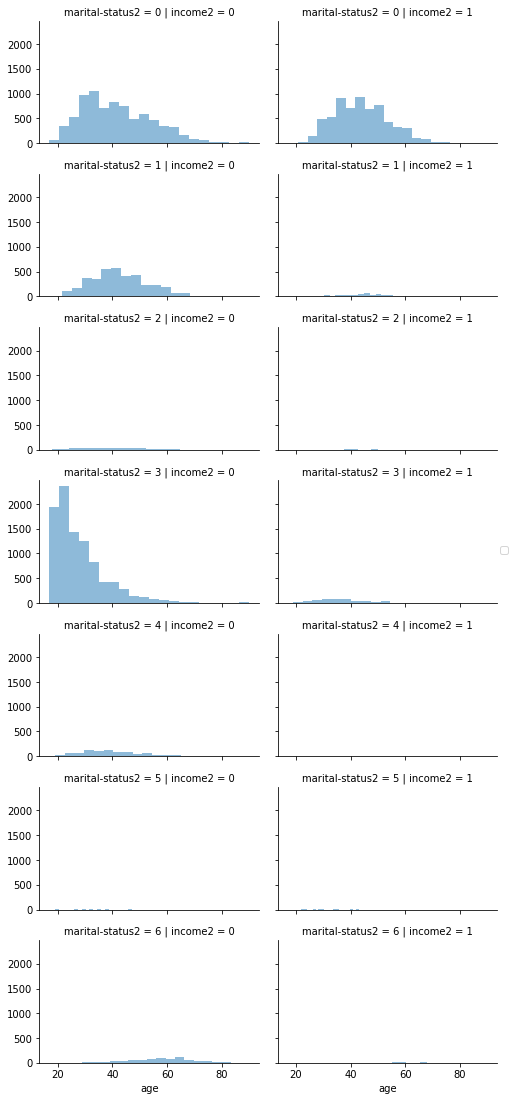

In [454]:
grid = sns.FacetGrid(orig_data, col='income2', row='marital-status2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**6. occupation**

In [455]:
orig_data.occupation.unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', '?'], dtype=object)

In [456]:
# remove rows where occupation is unknown
orig_data = orig_data[orig_data.occupation != '?']
print(orig_data.occupation.unique())

['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [460]:
# Map income occupation to numerical equivalent
feature ='occupation'
occupation = feature_dict(orig_data,feature)
orig_data['occupation2'] = orig_data['occupation'].map(occupation)

Exec-managerial
Handlers-cleaners
Prof-specialty
Other-service
Adm-clerical
Sales
Craft-repair
Transport-moving
Farming-fishing
Machine-op-inspct
Tech-support
Protective-serv
Armed-Forces
Priv-house-serv


Exec-managerial 0                             
Handlers-cleaners 1                             
Prof-specialty 2                             
Other-service 3                             
Adm-clerical 4                             
Sales    5                             
Craft-repair 6                             
Transport-moving 7                             
Farming-fishing 8                             
Machine-op-inspct 9                             
Tech-support 10                            
Protective-serv 11                            
Armed-Forces 12                            
Priv-house-serv 13                            


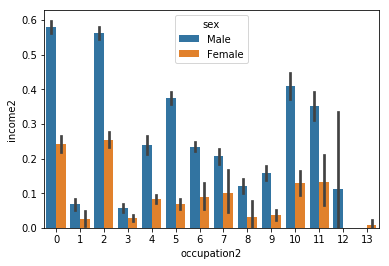

In [461]:
sns.barplot(x='occupation2', y='income2', data=orig_data, hue='sex')
for keys in occupation:
    label = occupation[keys]
    print("{:<8} {:<30}".format(keys, label))

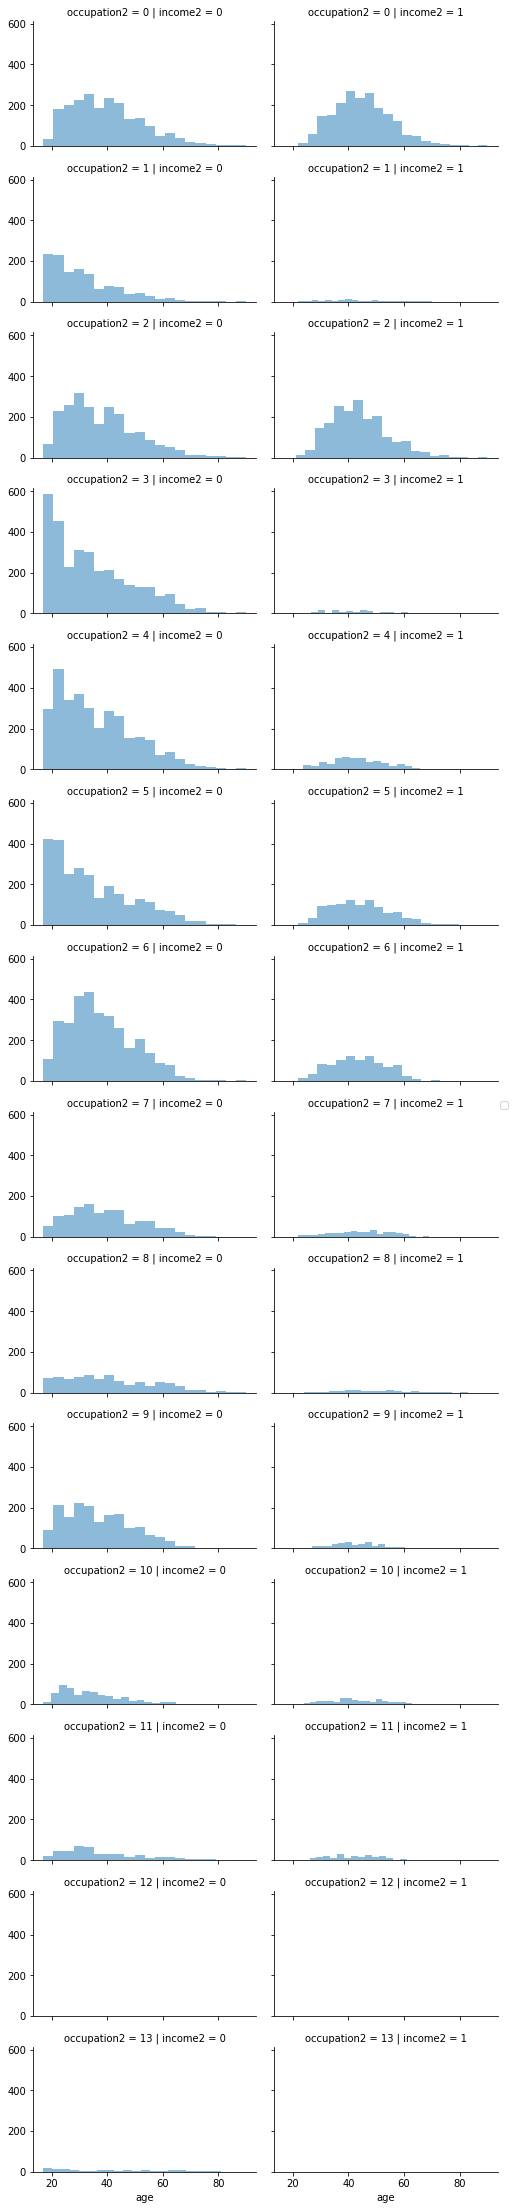

In [462]:
grid = sns.FacetGrid(orig_data, col='income2', row='occupation2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**7. relationship**

In [463]:
# Map income relationship to numerical equivalent
feature ='relationship'
relationship = feature_dict(orig_data,feature)
orig_data['relationship2'] = orig_data['relationship'].map(relationship)

Husband
Not-in-family
Wife
Own-child
Unmarried
Other-relative


Husband  0                             
Not-in-family 1                             
Wife     2                             
Own-child 3                             
Unmarried 4                             
Other-relative 5                             


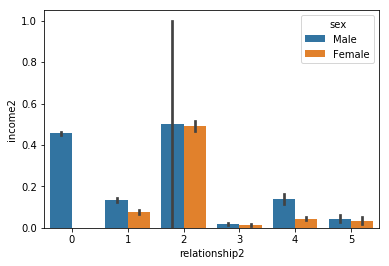

In [464]:
sns.barplot(x='relationship2', y='income2', data=orig_data, hue='sex')
for keys in relationship:
    label = relationship[keys]
    print("{:<8} {:<30}".format(keys, label))

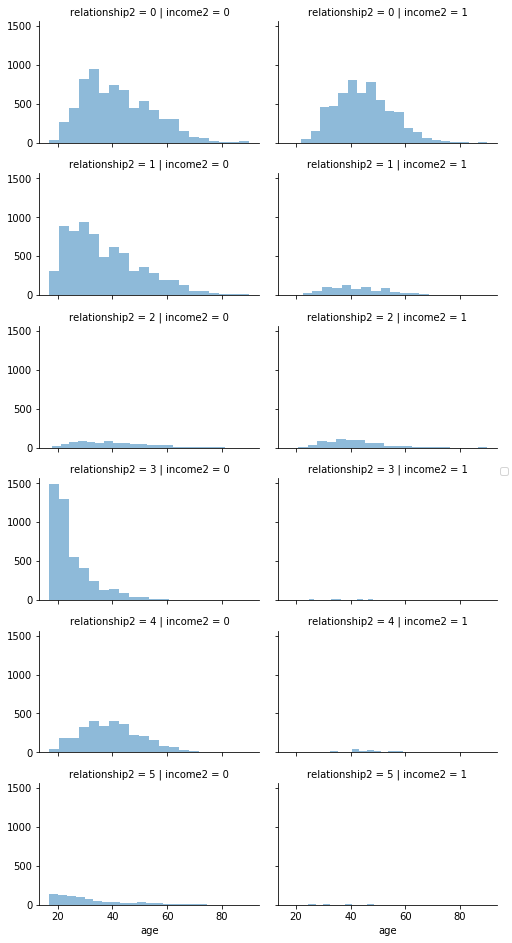

In [465]:
grid = sns.FacetGrid(orig_data, col='income2', row='relationship2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**8. race**

In [466]:
# Map income race to numerical equivalent
feature ='race'
race = feature_dict(orig_data,feature)
orig_data['race2'] = orig_data['race'].map(race)

White
Black
Asian-Pac-Islander
Amer-Indian-Eskimo
Other


White    0                             
Black    1                             
Asian-Pac-Islander 2                             
Amer-Indian-Eskimo 3                             
Other    4                             


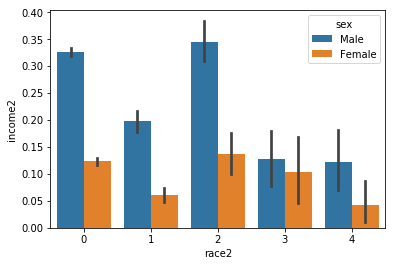

In [467]:
sns.barplot(x='race2', y='income2', data=orig_data, hue='sex')
for keys in race:
    label = race[keys]
    print("{:<8} {:<30}".format(keys, label))

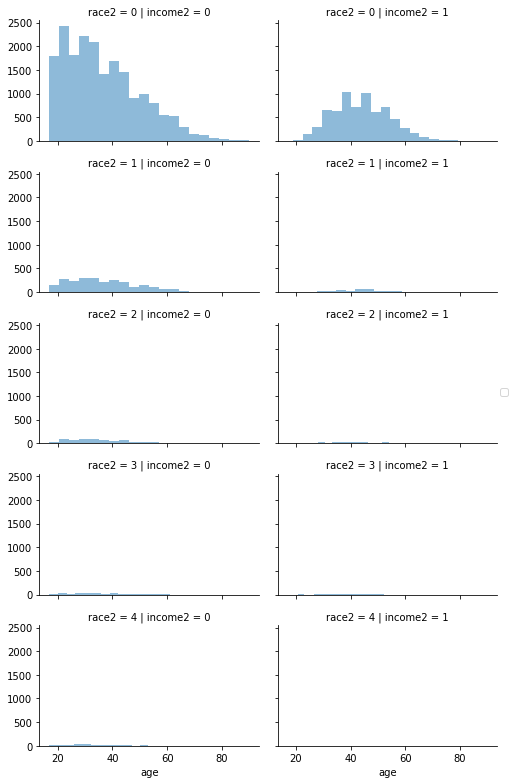

In [394]:
grid = sns.FacetGrid(orig_data, col='income2', row='race2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

**9. sex**

In [468]:
# Map income sex to numerical equivalent
feature ='sex'
sex = feature_dict(orig_data,feature)
orig_data['sex2'] = orig_data['sex'].map(sex)

Male
Female


Male     0                             
Female   1                             


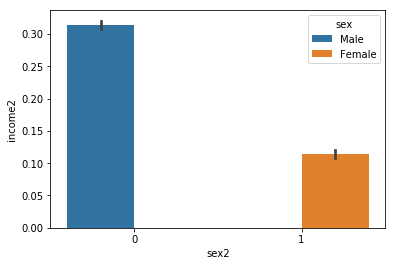

In [469]:
sns.barplot(x='sex2', y='income2', data=orig_data, hue='sex')
for keys in sex:
    label = sex[keys]
    print("{:<8} {:<30}".format(keys, label))

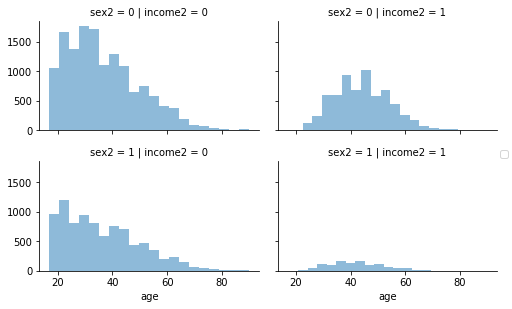

In [470]:
grid = sns.FacetGrid(orig_data, col='income2', row='sex2', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

# Data Preprocessing

### Converting Features

/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Male')

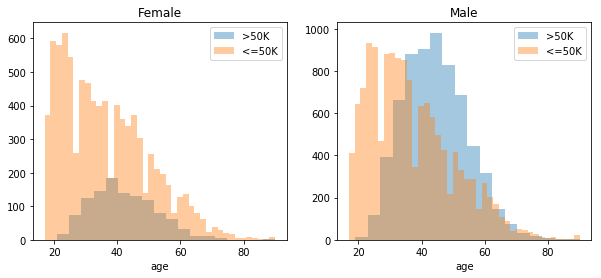

In [471]:
n_greater_50k = '>50K'
n_at_most_50k = '<=50K'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = orig_data[orig_data['sex2']== 1]
men = orig_data[orig_data['sex2'] == 0]
ax = sns.distplot(women[women.income2 ==1].age.dropna(), bins=18, label = n_greater_50k, ax = axes[0], kde =False)
ax = sns.distplot(women[women.income2 ==0].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men.income2 ==1].age.dropna(), bins=18, label = n_greater_50k, ax = axes[1], kde = False)
ax = sns.distplot(men[men.income2 ==0].age.dropna(), bins=40, label = n_at_most_50k, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Men have a high probability of earning >50K when they are between 30 and 60 years old. 
This is also true for women. However, for women the probability of earning >50K are higher between 25 and 50 years old. 

Since there seem to be **certain ages, which have increased odds of higher income**. It is also clear that in groups 11-20, and 71-100, there is almost no chance to have an income of greater than 50k. 

### Creating Categories

In [472]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
age_group = ['0_10', '11_20', '21_30', '31_40','41_50', '51_60', '61_70', '71_100']
orig_data['age_cat'] = pd.cut(orig_data['age'], bins, labels=age_group)

In [473]:
# Map the remaining features to numerical equivalent
feature ='capital-gain'
capital_gain = feature_dict(orig_data,feature)
orig_data['capital-gain2'] = orig_data['capital-gain'].map(capital_gain)

feature ='capital-loss'
capital_loss = feature_dict(orig_data,feature)
orig_data['capital-loss2'] = orig_data['capital-loss'].map(capital_loss)

feature ='hours-per-week'
hours_per_week = feature_dict(orig_data,feature)
orig_data['hours-per-week2'] = orig_data['hours-per-week'].map(hours_per_week)

feature ='native-country'
native_country = feature_dict(orig_data,feature)
orig_data['native-country2'] = orig_data['native-country'].map(native_country)

0
14084
5178
5013
2407
14344
15024
7688
4064
4386
7298
1409
3674
1055
2050
2176
2174
594
20051
6849
4101
8614
3411
2597
25236
4650
9386
2463
3103
10605
2964
3325
2580
3471
4865
99999
6514
1471
2329
2105
2885
10520
2202
2961
27828
6767
2228
1506
13550
2635
5556
4787
3781
3137
3818
914
401
2829
2977
4934
2062
2354
3464
5455
15020
1424
3273
22040
4416
10566
4931
7430
34095
6497
3908
114
7896
2346
2907
1151
2414
2290
3418
15831
41310
4508
2538
3456
1848
3887
5721
9562
6418
1455
2036
3942
1831
11678
2936
2993
7443
6360
4687
1797
6723
2009
3432
6097
1639
2653
18481
25124
7978
991
1173
2387
5060
1086
0
2042
1408
1902
1573
1887
1719
1762
1564
2179
1816
1980
1977
1876
1340
2206
1741
1485
2339
2415
1380
1721
2051
2377
1669
2352
1672
653
2392
1504
1590
1651
1628
1848
2001
1740
2002
1579
2258
1602
2547
2205
1726
2444
1138
2238
625
213
1539
880
1668
1092
1594
3004
2231
1844
810
2824
2559
2057
1974
974
2174
2149
1735
1258
2129
2603
2282
323
2246
1617
1648
1825
3770
1755
3683
4356
2267
2080
2457
419


### Save processed data into preproc folder

In [474]:
datapickle.df_to_pickle(orig_data)

# Building Machine Learning models

In [475]:
# Load preprocessed data if necessary:
proc_data = pd.read_pickle('./preproc/censusdata_preproc')
proc_data.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,marital-status2,occupation2,relationship2,race2,sex2,age_cat,capital-gain2,capital-loss2,hours-per-week2,native-country2
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,41_50,0,0,0,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,1,1,1,0,0,31_40,0,0,1,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,1,0,1,0,51_60,0,0,1,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,2,2,1,1,21_30,0,0,1,1
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,0,0,2,0,1,31_40,0,0,1,0


In [525]:
# Create the features matrix
X = proc_data[['age', 'workclass2', 'education_level2', 'education-num',
       'marital-status2', 'occupation2', 'relationship2', 'race2', 'sex2',
       'capital-gain2', 'capital-loss2', 'hours-per-week2', 'native-country2',
       'age_cat']]
print("Shape of Features:%s " % (X.shape,))
# create the target vector
y =  proc_data[['income2']]
print("Shape of Target:%s " % (y.shape,))

Shape of Features:(30717, 14) 
Shape of Target:(30717, 1) 


### Split into Training and Test Sets

In [527]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)
print("Shape of Training Features:%s " % (X_train.shape,))
print("Shape of Training Target:%s " % (y_train.shape,))
print("Shape of Testing Features:%s " % (X_test.shape,))
print("Shape of Testing Target:%s " % (y_test.shape,))


Shape of Training Features:(27645, 14) 
Shape of Training Target:(27645, 1) 
Shape of Testing Features:(3072, 14) 
Shape of Testing Target:(3072, 1) 


In [528]:
# Create standardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Apply Standardizer To Training And Test Sets

In [529]:
# Apply to both training and test sets
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

### Stochastic Gradient Descent (SGD):

In [530]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train_std, np.ravel(y_train))
Y_pred = sgd.predict(X_test_std)

sgd.score(X_train_std, np.ravel(y_train))

acc_sgd = round(sgd.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [531]:
acc_sgd

78.36

### Random Forest:

In [532]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_std, np.ravel(y_train))

Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))
acc_random_forest = round(random_forest.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [533]:
acc_random_forest

97.66

### Logistic Regression:

In [534]:
logreg = LogisticRegression()
logreg.fit(X_train_std, np.ravel(y_train))

Y_pred = logreg.predict(X_test_std)

acc_log = round(logreg.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [535]:
acc_log

81.4

### K Nearest Neighbor:

In [536]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_std, np.ravel(y_train))  
Y_pred = knn.predict(X_test_std)  
acc_knn = round(knn.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [537]:
acc_knn

89.29

### Gaussian Naive Bayes:

In [538]:
gaussian = GaussianNB() 
gaussian.fit(X_train_std,  np.ravel(y_train))  
Y_pred = gaussian.predict(X_test_std)  
acc_gaussian = round(gaussian.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [539]:
acc_gaussian

74.55

### Perceptron

In [540]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train_std, np.ravel(y_train))

Y_pred = perceptron.predict(X_test_std)

acc_perceptron = round(perceptron.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [541]:
acc_perceptron

72.94

### Linear Support Vector Machine:

In [542]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_std, np.ravel(y_train))

Y_pred = linear_svc.predict(X_test_std)

acc_linear_svc = round(linear_svc.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [543]:
acc_linear_svc

81.55

### Decision Tree

In [544]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_std, np.ravel(y_train))  
Y_pred = decision_tree.predict(X_test_std)  
acc_decision_tree = round(decision_tree.score(X_train_std, np.ravel(y_train)) * 100, 2)

In [545]:
acc_decision_tree

97.66

### Which is the best Model ?

In [546]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.66,Random Forest
97.66,Decision Tree
89.29,KNN
81.55,Support Vector Machines
81.40,Logistic Regression
78.36,Stochastic Gradient Decent
74.55,Naive Bayes
72.94,Perceptron


# K-Fold Cross Validation:

In [547]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train_std,  np.ravel(y_train), cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83369487 0.83333333 0.84231465 0.83104197 0.83212735 0.83502171
 0.83646889 0.83393632 0.83683068 0.85636758]
Mean: 0.8371137347667688
Standard Deviation: 0.007074172042792516


Random forest classifier has an average accuracy of 85% with a standard deviation of 0.6%. The standard deviation shows us how precise the estimates are.

### Feature Importance

In [548]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.176
marital-status2,0.122
occupation2,0.110
hours-per-week2,0.108
education-num,0.101
capital-gain2,0.079
relationship2,0.075
workclass2,0.052
age_cat,0.048


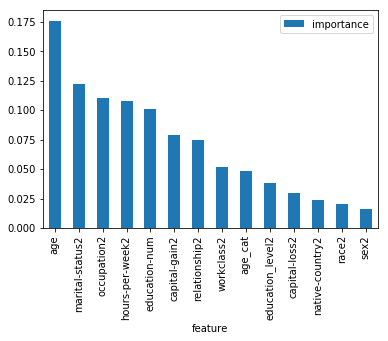

In [549]:
importances.plot.bar()

In [550]:
# drop sex
X_train  = X_train.drop("sex2", axis=1)
X_test  = X_test.drop("sex2", axis=1)

# drop race
X_train  = X_train.drop("race2", axis=1)
X_test  = X_test.drop("race2", axis=1)

# drop native-country
X_train  = X_train.drop("native-country2", axis=1)
X_test  = X_test.drop("native-country2", axis=1)


### Fit Standardizaer to Training Set

In [516]:
# Create standardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Apply Standardizer To Training And Test Sets

In [517]:
# Apply to both training and test sets
X_train_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

### Train Random Forest again

In [518]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train_std, np.ravel(y_train))
Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))

acc_random_forest = round(random_forest.score(X_train_std, np.ravel(y_train)) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.98 %


### out-of-bag samples

In [519]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.41 %


### Hyperparameter Tuning

In [520]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# start = time()
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=25, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=1)
# clf.fit(X_train_std, np.ravel(y_train))

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(clf.cv_results_['params'])))
# clf.best_params_

In [68]:
# clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 100}

### Test New parameters:

In [521]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train_std, np.ravel(y_train))
Y_prediction = random_forest.predict(X_test_std)

random_forest.score(X_train_std, np.ravel(y_train))

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 85.18 %


### Further Evaluation

In [551]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest,X_train_std, np.ravel(y_train), cv=3)
confusion_matrix(np.ravel(y_train), predictions)

array([[19006,  1777],
       [ 2694,  4168]])

The first row is about the <=50K predictions: **19006 people were correctly classified as having income <=50K** (true negatives) and **1777 were wrongly classified as having income <=50K** (false positives).
    
The second row is about income >50K: **2694 people were wrongly classified as having income >50K** (false negatives) and **4168 were correctly classified as having income >50K (true positives)**.
    

In [553]:
# Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(np.ravel(y_train), predictions))
print("Recall:",recall_score(np.ravel(y_train), predictions))

Precision: 0.7010933557611438
Recall: 0.6074030894782863


Our model predicts 70% of the time if a person is <=50 or >50 correctly(precision). The recall tells us that it predicted the income of 61% of the people who actually have income >50K

### F-Score:

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [554]:
from sklearn.metrics import f1_score
f1_score(np.ravel(y_train), predictions)

0.650894042320606

### Precision Recall Curve

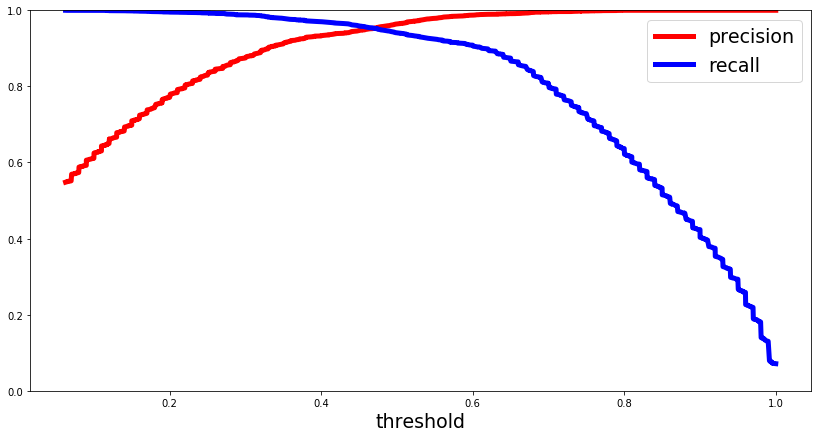

In [555]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train_std)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(np.ravel(y_train), y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 78%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other:

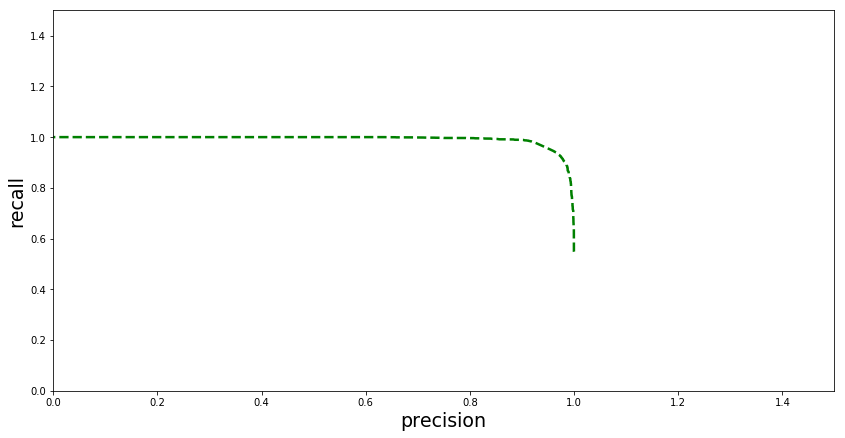

In [556]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

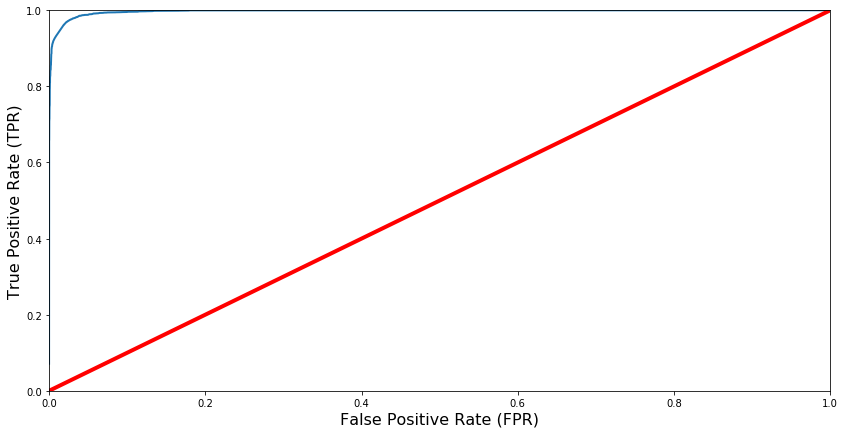

In [557]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.ravel(y_train), y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

### ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [558]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(np.ravel(y_train), y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9972827712289177


**Thats all folks!**